# HVC Snapshot Preperation Stage

## Step 1: establish which HVC we want to look at + setup

In [2]:
# Collate data
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator
import numpy as np

collated_data_masked_HVCs = collator.data_whole_sky(False, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")
collated_data_large_HVCs = collator.data_whole_sky(False, hvc_area_range=(np.pi, 50), load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")
collated_data_all_HVCs = collator.data_whole_sky(False, full_hvc_range=True, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating


KeyboardInterrupt: 

In [ ]:
# Display the HVC masked table

collated_data_masked_HVCs["HVCs"]

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G001.2-15.4-185,"283.26028447412233,-34.88611707131728",18 53 02.47,-34 53 10,-185.8,1.0,-181.2,-138.3,21.4,1.36,6e+19,2e+18,1.1,1.0,1.3,H1,CHVC 001.2-15.5-186,"GCN_GCN,N",Simbad,8,GHVC
G002.1-43.1-126,"317.81553732294526,-40.06667225172776",21 11 15.73,-40 04 00,-126.2,1.0,-120.0,-88.7,12.4,2.29,7e+19,1e+18,2.0,1.9,3.1,"T,H5",HVC 002.3-43.1-118,N,Simbad,21,GHVC
G003.9-36.8-137,"309.8759115687047,-38.218616973946475",20 39 30.22,-38 13 07,-137.2,1.0,-125.1,-99.7,24.1,0.90,4e+19,2e+18,1.9,4.3,2.4,H3,HVC 004.1-36.3-130,N,Simbad,38,GHVC
G005.2-33.0-128,"305.341411145527,-36.490005971303596",20 21 21.94,-36 29 24,-128.5,1.5,-111.5,-91.0,28.5,0.53,3e+19,3e+18,1.1,3.1,1.8,H2,HVC 005.6-32.9-120,N,Simbad,47,GHVC
G005.9-32.4-110,"304.7617860811444,-35.80695042693013",20 19 02.83,-35 48 25,-110.6,2.7,-91.3,-73.1,31.2,0.31,4e+18,3e+18,2.9,2.6,3.5,H1,HVC 006.4-31.5-088,N,Simbad,60,GHVC
G011.4-67.7-157,"347.9989551483094,-33.05028139969578",23 11 59.75,-33 03 01,-157.6,1.0,-141.0,-125.1,24.7,0.80,4e+19,2e+18,1.2,2.5,0.9,"T,H1",CHVC 011.6-67.7-155,"N,MS_MS",Simbad,110,GHVC
G015.7-14.6-219,"288.728035058528,-21.75250604671004",19 14 54.73,-21 45 09,-219.6,1.7,-162.0,-177.1,18.9,0.30,1e+19,2e+18,1.3,3.2,2.4,H2,HVC 015.9-14.3-222,"GCN_GCN,EN,N",Simbad,144,GHVC
G020.0-18.3-242,"294.0889102874738,-19.36083941143664",19 36 21.34,-19 21 39,-242.1,1.0,-170.5,-199.6,7.8,0.54,1e+19,8e+17,1.1,1.8,1.5,H1,HVC 020.1-18.1-242,"GCN_GCN,EN",Simbad,176,GHVC


In [ ]:
# We aim to analyse all of the HVCs of a particular area, so we go by index

# Specific HVC

index = 29 #59 or 60
selected_HVC = collated_data_masked_HVCs["HVCs"][collated_data_masked_HVCs["HVCs"]["Name"]=="G254.9+39.7+094"][0]#collated_data_masked_HVCs["HVCs"][index]
selected_HVC

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G254.9+39.7+094,"157.48499293825415,-9.60888443705413",10 29 56.40,-09 36 32,94.2,1.9,-69.2,56.7,9.6,0.14,4e+18,9e+17,1.2,3.0,2.3,H1,HVC 255.1+39.9+096,"WB,WA,P",Simbad,634,GHVC


## Step 2: Determine field corners

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u

dx = selected_HVC['dx']
dy = selected_HVC['dy']

# Twice the area of the HVC to ensure it's including all of the HVC
di = max(dx, dy) * u.deg

centre_coord = selected_HVC['SkyCoord'].galactic

# Only check for overflows as di will always be positive
#new_dec = centre_coord.l + di
#if new_dec.value > 90:
#    new_dec = 180 * u.deg - new_dec # This covers obtuse/reflex angles up to 360 degrees

# Calculate upper corner coordinate
new_coord = SkyCoord(centre_coord.l+di*2, centre_coord.b+di*2, frame='galactic')#SkyCoord((centre_coord.+di), new_dec, frame='galactic')

# Only check for underflows as di will always be positive
#new_dec = centre_coord.dec - di*2
#if new_dec.value < -90:
#    new_dec = - (180 * u.deg + new_dec) # This covers obtuse/reflex angles up to -360 degrees

# Calculate lower corner coordinate
#new_coord = SkyCoord((centre_coord.ra-di*2), new_dec, frame='icrs')

# IMPORTANT: The upper corner may not have values greater. This cannot be shortcut by swapping coordinates around, and must be accounted for
print(centre_coord, new_coord)

<SkyCoord (Galactic): (l, b) in deg
    (254.9982448, 39.74625473)> <SkyCoord (Galactic): (l, b) in deg
    (260.9982448, 45.74625473)>


If the HVC is on the corner of the sky, then don't analyse it.

In [ ]:
if centre_coord.l > new_coord.l or centre_coord.b > new_coord.b:
    print("DON'T ANALYSE")

## Step 3: Crop images

Assume that the corners are accurate for the time being.

[1189, 1627] [1261, 1555]


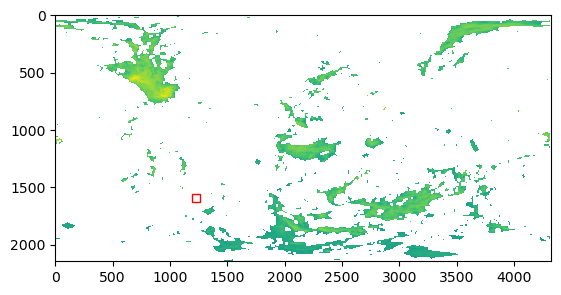

In [ ]:
from astropy.wcs import WCS
from wcs import image_transform as it

wcs = WCS(collated_data_masked_HVCs["HI"].header)
pix_down = list(np.array(list(map(int, it.get_pixel(wcs, centre_coord))))-1)
pix_up = list(np.array(list(map(int, it.get_pixel(wcs, new_coord))))-1)
print(pix_up, pix_down)

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

plt.imshow(collated_data_masked_HVCs["HI"].data)
plt.gca().add_patch(Rectangle(
    (pix_up[0], pix_down[1]),
    np.abs(pix_up[0]-pix_down[0]),
    np.abs(pix_up[1]-pix_down[1]),
    linewidth=1,edgecolor='r',facecolor='none'
    ))
plt.show()

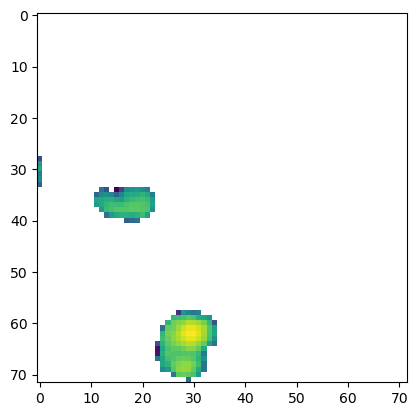

In [ ]:
def crop_img_1d(img, pixel_up, pixel_down):
    img = img[pixel_down[1]:pixel_up[1]]
    return img

def crop_img(img, pixel_up, pixel_down):
    img = img[pixel_down[1]:pixel_up[1]] if pixel_down[1]<pixel_up[1] else img[pixel_up[1]:pixel_down[1]]
    img = np.transpose(img)
    img = img[pixel_down[0]:pixel_up[0]] if pixel_down[0]<pixel_up[0] else img[pixel_up[0]:pixel_down[0]]
    img = np.transpose(img)
    return img

plt.imshow(crop_img(collated_data_masked_HVCs["HI"].data, pix_up, pix_down))
plt.show()

Testing the implemented function:

[1189, 1627]
[1261, 1555]


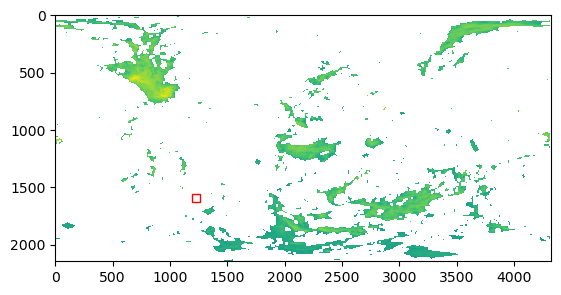

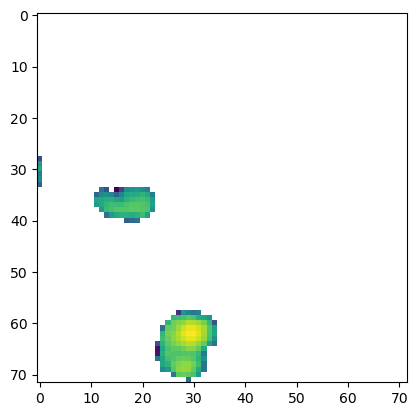

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [ ]:
from collation import hvc_snapshot as snap
snap.crop_wcs([centre_coord, new_coord], collated_data_masked_HVCs["HI"], True)

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


[6695, 3257]
[6839, 3113]


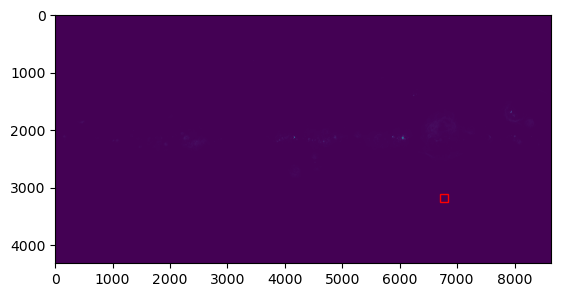

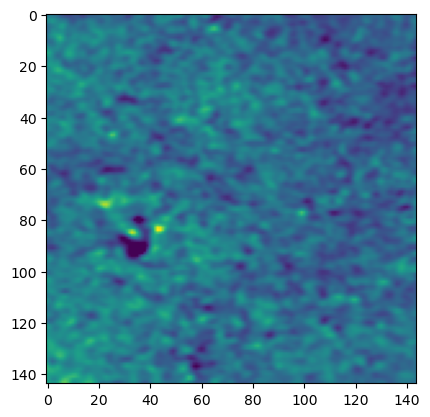

array([[1.1450195 , 1.1040039 , 1.0541992 , ..., 0.9099121 , 0.9375    ,
        0.9614258 ],
       [1.2109375 , 1.2270508 , 1.2158203 , ..., 0.8701172 , 0.98828125,
        1.0546875 ],
       [1.3222656 , 1.3984375 , 1.4301758 , ..., 0.9172363 , 1.0908203 ,
        1.1679688 ],
       ...,
       [1.5942383 , 1.5009766 , 1.4248047 , ..., 1.309082  , 1.269043  ,
        1.1811523 ],
       [1.5922852 , 1.4545898 , 1.3261719 , ..., 1.2211914 , 1.184082  ,
        1.1123047 ],
       [1.6240234 , 1.5585938 , 1.4799805 , ..., 1.1191406 , 1.0839844 ,
        1.0556641 ]], dtype=float32)

In [ ]:
snap.crop_wcs([centre_coord, new_coord], collated_data_masked_HVCs["H-alpha"], True)

## Step 4: Isolate RMs

This can be done by simply masking the table of RM data.

In [ ]:
gal_RM_locations = collated_data_masked_HVCs["RMs"]["ra_dec_obj"].galactic
mask = list(map(lambda rm_loc: centre_coord.l < rm_loc.l < new_coord.l and centre_coord.b < rm_loc.b < new_coord.b, gal_RM_locations))
mask[0] = True

filtered = collated_data_masked_HVCs["RMs"][mask]

#print(sum(mask))
#print(centre_coord,new_coord)
#plt.plot(gal_RM_locations.l, gal_RM_locations.b, '.')

#plt.imshow(np.flip(collated_data_masked_HVCs["HI"].data), aspect='auto', extent=(0, 360, -90, 90), origin="lower")
#plt.show()


In [ ]:
from wcs import image_transform as it

pre_fg_list = []
post_fg_list = []

for entry in filtered:
    coords = entry["ra_dec_obj"].galactic
    strength = it.get_flux_at_point(collated_data_masked_HVCs["interpolation"]["interpolation"], coords)
    pre_fg_list.append(strength)

filtered.add_column(pre_fg_list, name="interpolation_raw")

filtered

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


ra_dec_obj,H-alpha flux [Error],H-alpha flux,faraday_depth_radmm,faraday_depth_err_radmm,interpolation_raw
"deg,deg",R,R,rad / m2,rad / m2,
SkyCoord,float32,float32,float64,float64,float64
"202.81578062778394,-16.126783338240127",0.73828125,4.9140625,5.279544100397107,0.8983063531113807,-4.059993908989179


In [ ]:
table = collated_data_masked_HVCs["HVCs"]['SkyCoord'].galactic
mask = list(map(lambda x: x.l.value > 250 and x.l.value < 270, table))
table = collated_data_masked_HVCs["HVCs"][mask]
table

#collated_data_masked_HVCs["HVCs"][collated_data_masked_HVCs["HVCs"]["recno"]==608]

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G251.7-62.8+174,"41.08549876162332,-41.3166649391577",02 44 20.52,-41 19 00,174.2,1.4,79.0,136.7,20.6,0.42,2e+19,2e+18,1.8,3.2,2.7,H6,HVC 251.7-62.7+174,"P,MS_MS",Simbad,608,GHVC
G252.4-10.1+293,"112.4824104894051,-39.65054948128392",07 29 55.78,-39 39 02,293.0,1.0,86.5,235.5,22.0,0.95,4e+19,2e+18,1.7,1.4,2.0,"T,H1",HVC 252.6-10.2+284,EP,Simbad,613,GHVC
G253.3+44.1+185,"159.56932655394473,-5.558884590518593",10 38 16.64,-05 33 32,185.6,2.2,34.3,148.1,17.3,0.21,7e+18,2e+18,1.2,1.9,2.2,H2,HVC 253.3+44.0+187,"WA,P,EP",Simbad,618,GHVC
G254.9+39.7+094,"157.48499293825415,-9.60888443705413",10 29 56.40,-09 36 32,94.2,1.9,-69.2,56.7,9.6,0.14,4e+18,9e+17,1.2,3.0,2.3,H1,HVC 255.1+39.9+096,"WB,WA,P",Simbad,634,GHVC
G256.6+18.7+142,"143.34103388691113,-25.872216894066508",09 33 21.85,-25 52 20,142.9,1.9,-59.8,95.4,15.4,0.22,1e+19,1e+18,1.5,2.8,2.2,H2,HVC 256.5+18.8+143,"WB,P",Simbad,656,GHVC
G257.2+22.0+189,"146.33024222020148,-23.915828164969717",09 45 19.26,-23 54 57,189.8,1.0,-9.1,142.3,20.5,0.88,3e+19,2e+18,1.2,1.9,2.6,H3,HVC 257.2+21.9+188,"P,EP",Simbad,663,GHVC
G257.3+33.7-295,"154.8515342253411,-15.370550918273562",10 19 24.37,-15 22 14,-295.3,2.2,-473.8,-257.8,8.7,0.11,2e+18,9e+17,1.1,1.3,1.4,,,EN,Simbad,667,GHVC
G258.0+18.5+144,"144.2312004454369,-26.91416138459892",09 36 55.49,-26 54 51,144.6,1.8,-59.4,97.1,23.3,0.36,2e+19,2e+18,1.1,1.7,1.8,H1,HVC 258.1+18.8+145,"WB,P",Simbad,674,GHVC


## Step 5: Foreground corrections

In [ ]:
def punch_annulus(base, inner_radius, outer_radius, centre=False):
        if not centre:
            centre = (len(base[0])/2, len(base)/2)
        
        for y in range(len(base)):
            for x in range(len(base[y])):
                if inner_radius ** 2 < ((x-centre[0]) ** 2 + (y-centre[1]) ** 2) < outer_radius ** 2:
                    base[y][x] = 0
        
        return base

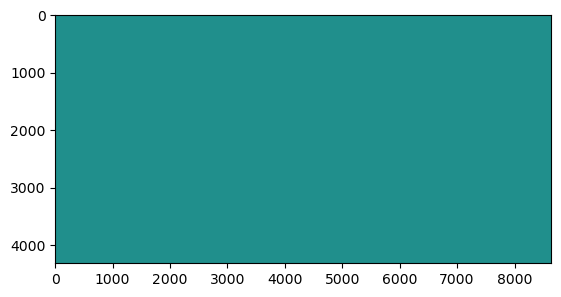

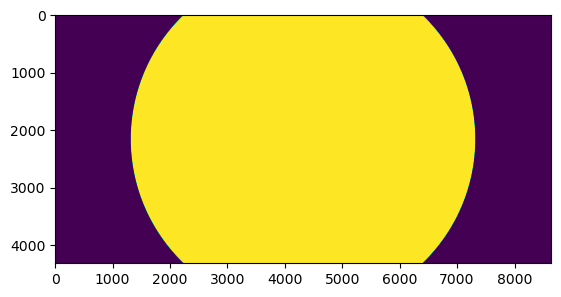

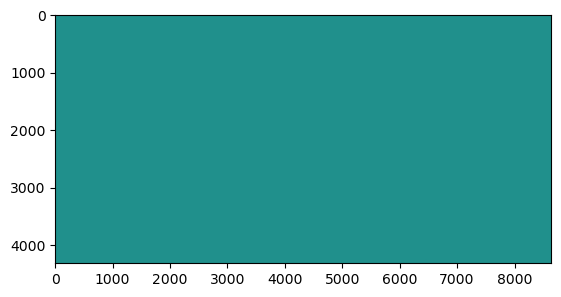

In [ ]:
from collation import hvc_snapshot as snap
from foreground import foreground_remover as fgrm

# Define a scaling constant
scale = 3000

# Punch the annulus
annulus_space = (collated_data_masked_HVCs["interpolation"]["k-space"].real * 0) +1
plt.imshow(collated_data_masked_HVCs["interpolation"]["k-space"].real)
plt.show()

annulus_space = punch_annulus(annulus_space, scale, np.pi*scale)
plt.imshow(annulus_space)
plt.show()

new_k_space = annulus_space*collated_data_masked_HVCs["interpolation"]["k-space"]

plt.imshow(new_k_space.real)
plt.show()

[ 2.54443202e+08  2.23516650e+05  1.21841598e+02 ... -2.48905949e+04
  1.21841597e+02  2.23516650e+05]


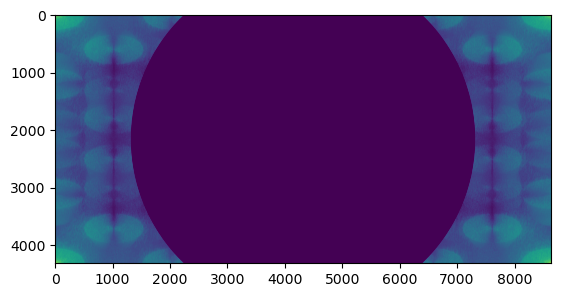

In [ ]:
print(sum(collated_data_masked_HVCs["interpolation"]["k-space"].real-new_k_space.real))
plt.imshow(np.log(abs(collated_data_masked_HVCs["interpolation"]["k-space"].real-new_k_space.real)+1))
plt.show()

23462282.0
8640


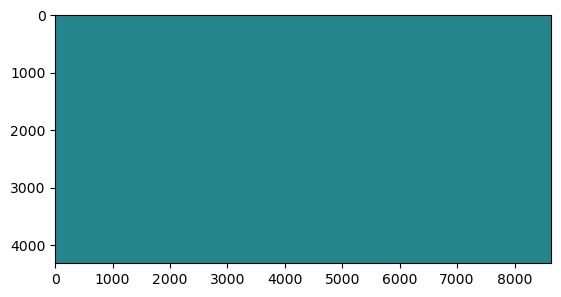

[6695, 3257]
[6839, 3113]


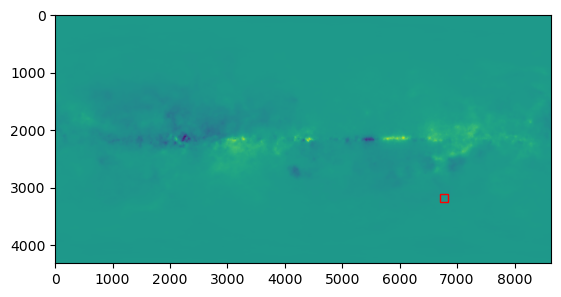

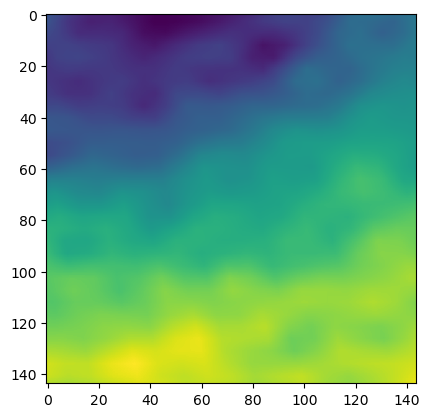

[6695, 3257]
[6839, 3113]


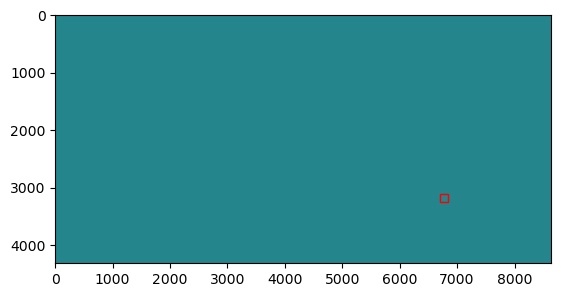

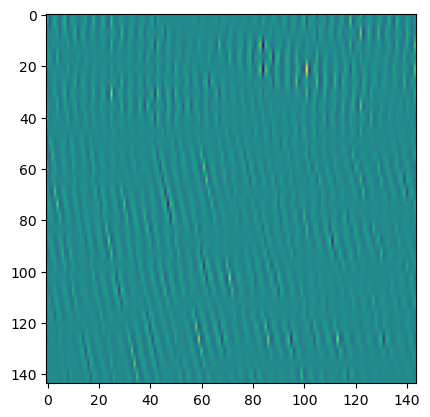

In [ ]:
print(sum(sum(annulus_space)))
print(len(annulus_space[0]))

from dict2obj import Dict2Obj

corr_fg = Dict2Obj({"header":collated_data_masked_HVCs["interpolation"]["interpolation"].header, "data":fgrm.get_corrected_image(new_k_space).real})
plt.imshow(corr_fg.data)
plt.show()

snap_interp = snap.crop_wcs([centre_coord, new_coord], collated_data_masked_HVCs["interpolation"]["interpolation"], True)
snap_corr = snap.crop_wcs([centre_coord, new_coord], corr_fg, True)


## Putting it all together

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator
import numpy as np

collated_data = collator.data_whole_sky(False, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

print()

from collation import hvc_snapshot as snap

index = 29 #59 or 60
selected_HVC = collated_data["HVCs"][collated_data["HVCs"]["Name"]=="G254.9+39.7+094"][0]#collated_data_masked_HVCs["HVCs"][index]

snapshot = snap.take_snapshot(index, collated_data["RMs"], collated_data["HVCs"], collated_data["HI"], collated_data["H-alpha"], collated_data["interpolation"], custom_selection=selected_HVC)

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete

=== HVC SNAPSHOT ===
Gathering data ...
Determining corners
Cropping H-alpha
Cropping HI
Cropping interpolation
Filtering RMs
0 RM grid points found
Correcting foreground
Snipping complete


In [2]:
snapshot["RMs"]

#import matplotlib.pyplot as plt
#plt.imshow()
#plt.show()



ra_dec_obj,H-alpha flux [Error],H-alpha flux,faraday_depth_radmm,faraday_depth_err_radmm,interpolation_raw,interpolation_cor,interpolation_unc
"deg,deg",R,R,rad / m2,rad / m2,,,
SkyCoord,float32,float32,float64,float64,float64,float64,float64
"202.81578062778394,-16.126783338240127",0.73828125,4.9140625,5.279544100397107,0.8983063531113807,-4.059993908989179,0.0030782057355526996,5.225696471726144
